# Introduction to Neural Networks for Economists

## 1. Motivation: Beyond Linear Models

In economics, we often rely heavily on linear regression (OLS). While powerful for inference and interpreting marginal effects (e.g., $\beta$ is the change in $Y$ given a unit change in $X$), linear models can struggle with complex, non-linear patterns in data.

A **Neural Network** is a universal function approximator. It can learn highly complex, non-linear relationships between inputs ($X$) and outputs ($Y$) without requiring the economist to explicitly specify interaction terms or polynomial features.

Today we will cover:
1. The History of Neural Networks.
1. The "Perceptron": A single neuron.
2. Multi-Layer Perceptrons (MLP): The basic deep learning architecture.
3. Forward Propagation and Backpropagation (Conceptual).
4. Implementation in Python comparing OLS vs. Neural Nets.

## The History of Neural Networks

- 1958: The Perceptron (Frank Rosenblatt)
    - Inspired by biological neurons. Could classify simple, linear data.
    - The New York Times reported it would "be able to walk, talk, see, write, reproduce itself and be conscious."
- 1969: The "AI Winter"
    - Minsky & Papert proved Perceptrons could not solve non-linear problems (like the XOR logic gate). Funding dried up.
- 1986: Backpropagation (Hinton, et al.)
    - A method to effectively train multi-layer networks was popularized, solving the non-linear problem.
- 2012: The Deep Learning Boom (AlexNet)
    - GPU computing + Massive Data (ImageNet) allowed massive networks to beat human performance in image recognition.

## Why are GPUs Important?

- Neural Networks require massive amounts of matrix multiplications.
- GPUs (Graphics Processing Units) are designed for parallel processing, making them ideal for training large neural networks efficiently.
- Think of the CPU in your computer as a single very fast worker, while a GPU is like having thousands of slower workers all working simultaneously on different parts of the task.

## The Perceptron: A Single Neuron

Biology Analogy: A neuron receives electrical signals (inputs), aggregates them, and if the signal is strong enough, it "fires" (output).

The Math:

- Inputs ($X$): Features (e.g., Education, Experience).
- Weights ($w$): Importance of each feature (similar to $\beta$ in OLS).
- Weighted Sum: $z = \sum (X_i \cdot w_i) + bias$
- Activation Function ($\sigma$): A non-linear switch (e.g., Sigmoid, ReLU).

$$
\text{Output} = \sigma(X \cdot w + b)
$$

Note: If the Activation Function is just "Identity" (do nothing), a single perceptron is essentially Linear Regression!

## Multi-Layer Perceptrons (MLP)

- The Limitation of One Neuron: Can only draw straight lines (linear decision boundaries).
- The Solution: Stack them!
- Architecture:
    - Input Layer: Your raw data.
    - Hidden Layers: Neurons that take inputs from previous layers and output to the next. This is where "feature learning" happens.
    - Output Layer: The final prediction ($\hat{Y}$).
    - Why "Deep" Learning? "Deep" just refers to having many hidden layers.

## The Neural Network Approach

Common activation functions include:
- **ReLU (Rectified Linear Unit):** $\max(0, z)$ (Most common in deep learning)
- **Sigmoid:** $\frac{1}{1+e^{-z}}$ (Used for binary classification outputs)
- **Linear:** Just $z$ (Used for the final output in regression)

### Architecture
We will use `MLPRegressor` (Multi-Layer Perceptron) and the `Perceptron` from scikit-learn.

<img src="figures/Gemini_Generated_Image_1c2drq1c2drq1c2d.png" width="800" />

1. **Input Layer:** Our variables $X_1, X_2$.
2. **Hidden Layers:** Where the magic happens. The network learns intermediate representations.
3. **Output Layer:** The prediction $\hat{Y}$.

## Forward Propogation (Making a Prediction)

- Concept: Data flows forward through the network.
- Step-by-Step: 
    - Input data enters the first layer.
    - Multiplied by weights ($w$) and added to bias ($b$).
    - Passed through activation function (e.g., ReLU zeroes out negatives).
    - Result passes to the next layer.
    - Repeat until the Output Layer produces $\hat{Y}$.

Economic Analogy: Like a series of committees. Committee A reviews the raw data and passes a summary to Committee B. Committee B reviews the summary and makes a final decision.

## Backpropagation (Learning from Mistakes)

- The Goal: Find the weights ($w$) that minimize the error (Loss Function).
- The Process:
    - Calculate Error: Compare prediction $\hat{Y}$ to actual $Y$ (e.g., $(Y - \hat{Y})^2$).
    - Assign Blame (Chain Rule): Move backward from the output to find out which weight contributed most to the error.
    - Update Weights (Gradient Descent): Nudge the weights in the opposite direction of the error.
- Analogy: You are hiking down a mountain in the dark. You feel the slope under your feet (the gradient) and take a step downhill. Repeat until you reach the bottom (minimum error).

| Feature          | Ordinary Least Squares (OLS) | Neural Network (MLP)               |
| :--------------- | :--------------------------- | :--------------------------------- |
| Equation         | Y^=β0​+β1​X1​+β2​X2​         | Y^=f(g(Xw1​)w2​)...                |
| Structure        | "Rigid                       | Linear                             |, Additive","Flexible, Non-Linear, Interactive"
| Interpretability | High (β = marginal effect)   | "Low (""Black Box"")"              |
| Data Needs       | Works well with small N      | Needs large N to avoid overfitting |
| Best Use         | "Inference                   | Causal Analysis"                   |,Pure Prediction (High Accuracy)

<video width=" " height=" " 
       src="figures/Video_Illustrating_Backpropagation_and_Forward_Propagation.mp4"  
       controls>
</video>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Set seed for reproducibility
np.random.seed(42)
sns.set_theme(style="whitegrid")

## 2. Generating Non-Linear Economic Data

Let's simulate a classic production function scenario, but with a twist. Imagine output ($Y$) differs based on whether inputs are low or high in a non-linear interaction way (e.g., threshold effects).

$$ Y_i = X_{1i} \cdot X_{2i} + \sin(2 \pi X_{1i}) + \epsilon_i $$

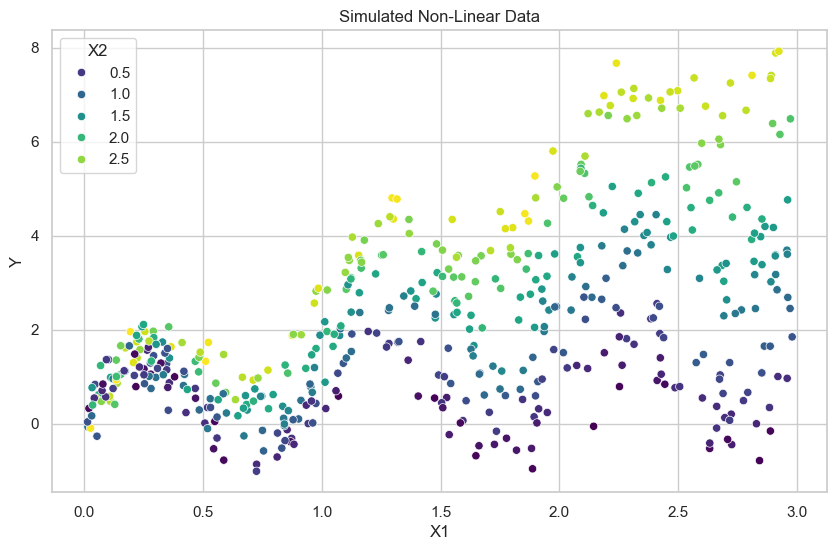

In [2]:
def generate_data(n=500):
    X1 = np.random.uniform(0, 3, n)
    X2 = np.random.uniform(0, 3, n)
    # Non-linear relationship
    Y = (X1 * X2) + np.sin(2 * np.pi * X1) + np.random.normal(0, 0.3, n)

    return pd.DataFrame({"X1": X1, "X2": X2, "Y": Y})


df = generate_data(n=500)

plt.figure(figsize=(10, 6))
sns.scatterplot(x="X1", y="Y", hue="X2", data=df, palette="viridis")
plt.title("Simulated Non-Linear Data")
plt.show()

## 3. The Economist's Baseline: OLS

Let's see how a standard linear model performs. We will try to capture interactions, but we might miss the sine wave component if we don't know it exists beforehand.

In [3]:
# Split data
X = df[["X1", "X2"]]
y = df["Y"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Join for statsmodels
train_df = X_train.copy()
train_df["Y"] = y_train

# Fit OLS with interaction
mod_ols = smf.ols("Y ~ X1 * X2", data=train_df).fit()
print(mod_ols.summary())

# Predict
y_pred_ols = mod_ols.predict(X_test)
mse_ols = mean_squared_error(y_test, y_pred_ols)
print(f"\nOLS MSE: {mse_ols:.4f}")

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     887.5
Date:                Tue, 20 Jan 2026   Prob (F-statistic):          2.44e-175
Time:                        13:23:38   Log-Likelihood:                -431.08
No. Observations:                 400   AIC:                             870.2
Df Residuals:                     396   BIC:                             886.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5176      0.135      3.828      0.0

In [4]:
## The Perceptron
# Sklearn's Perceptron is for classification tasks
# So we will create our own simple perceptron for regression purposes


class SimplePerceptron:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iter):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = linear_output  # Identity activation for regression

                # Update weights and bias
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return linear_output  # Identity activation for regression


# Train Simple Perceptron

perceptron = SimplePerceptron(learning_rate=0.01, n_iter=1000)

perceptron.fit(X_train.values, y_train.values)
y_pred_perceptron = perceptron.predict(X_test.values)
mse_perceptron = mean_squared_error(y_test, y_pred_perceptron)
print(f"\nSimple Perceptron MSE: {mse_perceptron:.4f}")


Simple Perceptron MSE: 1.2202


In [5]:
# IMPORTANT: Neural Networks require scaling!
# Unlike OLS, magnitude of inputs affects the weights significantly.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Neural Network
# hidden_layer_sizes=(64, 32): 2 hidden layers with 64 and 32 neurons
# activation='relu': Non-linear activation
# max_iter=1000: Number of epochs (passes through data)
nn_reg = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    max_iter=1500,
    random_state=42,
    early_stopping=True,
)

nn_reg.fit(X_train_scaled, y_train)

y_pred_nn = nn_reg.predict(X_test_scaled)
mse_nn = mean_squared_error(y_test, y_pred_nn)

print(f"Neural Network MSE: {mse_nn:.4f}")
print(f"OLS MSE: {mse_ols:.4f}")

Neural Network MSE: 0.1787
OLS MSE: 0.5338


## 5. Visualizing the Difference

Since we only have 2 inputs, we can visualize the "decision surface" or functional form learned by both models. We will fix $X_2$ at its mean and see how the prediction varies with $X_1$.

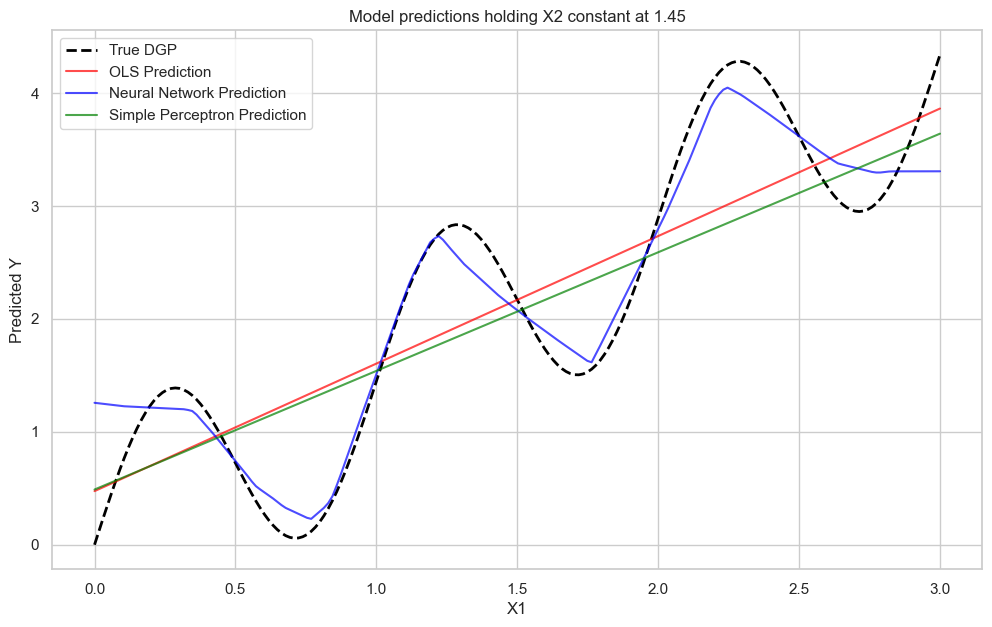

In [6]:
# Create a grid for plotting
x1_grid = np.linspace(0, 3, 200)
x2_fixed = np.mean(X["X2"])

# Prepare inputs
plot_df = pd.DataFrame({"X1": x1_grid, "X2": [x2_fixed] * 200})
plot_X_scaled = scaler.transform(plot_df)

# Predictions
plot_df["OLS_Pred"] = mod_ols.predict(plot_df)
plot_df["NN_Pred"] = nn_reg.predict(plot_X_scaled)
plot_df["Perceptron_Pred"] = perceptron.predict(plot_df[["X1", "X2"]].values)
plot_df["True_Function"] = (plot_df["X1"] * plot_df["X2"]) + np.sin(
    2 * np.pi * plot_df["X1"]
)

# Plotting
plt.figure(figsize=(12, 7))
plt.plot(
    plot_df["X1"],
    plot_df["True_Function"],
    label="True DGP",
    color="black",
    linestyle="--",
    linewidth=2,
)
plt.plot(
    plot_df["X1"], plot_df["OLS_Pred"], label="OLS Prediction", color="red", alpha=0.7
)
plt.plot(
    plot_df["X1"],
    plot_df["NN_Pred"],
    label="Neural Network Prediction",
    color="blue",
    alpha=0.7,
)
plt.plot(
    plot_df["X1"],
    plot_df["Perceptron_Pred"],
    label="Simple Perceptron Prediction",
    color="green",
    alpha=0.7,
)

plt.title(f"Model predictions holding X2 constant at {x2_fixed:.2f}")
plt.xlabel("X1")
plt.ylabel("Predicted Y")
plt.legend()
plt.show()

## How was it able to do this?

- This is the power of neural networks. 
- In between two linear layers, it used an activation function (ReLU) to introduce non-linearity.
- $ReLU(x) = \max(0, x)$
- Why is that so powerful?

1. The "Sandwich" Theory

- Think of a Neural Network as a sandwich:
    - Layer 1 (Bread): Linear Transformation
    - ReLU (Meat): Non-Linear Activation
    - Layer 2 (Bread): Linear Transformation
- If you take out the meat (ReLU), you are just stacking two pieces of bread on top of each other. 
- You don't have a sandwich anymore; you just have a thicker slice of bread. 

The Math (Why it collapses)In linear algebra, a linear transformation followed by another linear transformation is still just a linear transformation.

- Let’s look at the math: 
- Let $W_1$ be the weights of Layer 1.
- Let $W_2$ be the weights of Layer 2.
- Let $X$ be the input.

- With ReLU (Correct):

$$
\hat{Y} = W_2 \cdot \text{ReLU}(W_1 \cdot X)
$$

- Because of the ReLU, $W_1$ and $W_2$ cannot be combined. 
- The function can bend.

- Without ReLU (Incorrect):

$$
\hat{Y} = W_2 \cdot (W_1 \cdot X)
$$

- By the associative property of matrix multiplication, we can just multiply the weights together first:

$$
\hat{Y} = (W_2 \cdot W_1) \cdot X
$$

$$
\hat{Y} = W_{new} \cdot X
$$

- Result: You just created a standard OLS regression ($Y = \beta X$) but used way more computing power to do it. 

You cannot model curves, interaction terms, or complex shapes.

## What ReLU actually does (The "Bend")

- ReLU stands for Rectified Linear Unit. 
- It is a simple function:

$$
f(x) = \max(0, x)
$$

- If the number is positive, keep it.
- If the number is negative, turn it to zero.

## Why is this so powerful?
- It introduces a "Kink" or a bend in the graph.
- Layer 1 draws a bunch of straight lines.
- ReLU breaks those lines (bends them) at 0.
- Layer 2 combines those bent lines to approximate any curved shape.

- Economic Analogy: Imagine you are modeling Wage vs. Education.
- Linear Model (Layer 1 only): You can only draw a straight line. If you predict wages go up with education, that line goes up forever.
- Linear + ReLU: You can say: 
    - "If Education < 12 years, the return is flat (slope 0). 
    - If Education > 12 years, the return is steep (slope positive).
    - "The ReLU allows the model to "switch on" different slopes for different parts of the population.

## 6. Interpretability vs. Accuracy Trade-off

The plot above illustrates a fundamental trade-off in Data Science for Economics:

1.  **OLS**: Completely failed to capture the sine wave oscillation. However, we can write down exactly what the equation is: $\hat{Y} = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_1 X_2$. We can test the hypothesis "Is $\beta_3 = 0$?"
2.  **Neural Network**: Captured the wiggle of the sine wave almost perfectly. However, the model essentially consists of hundreds of weight parameters ($w_{ij}$) that have no direct economic interpretation. We cannot easily say "increasing X1 by 1 unit increases Y by $\beta$" because the slope changes constantly.

### When to use Neural Networks in Economics?

-   **Prediction Tasks:** When you just need the best possible $\hat{Y}$ (e.g., predicting poverty based on satellite imagery).
-   **Nuisance Parameters:** In Heterogeneous Treatment Effects or Double Machine Learning (DML), we use ML to "partial out" complex controls before running a simpler causal regression.

## Recreating the model in PyTorch

- We can also implement a simple neural network in PyTorch for more flexibility and control over the architecture and training process.
- PyTorch is the standard deep learning library used in research and industry.
- But before we do that, we need to learn about tensors, the fundamental data structure in PyTorch.

## What are Tensors?

- Tensors are similar to matrices but can have more than two dimensions.
- They are the primary data structure used in deep learning frameworks like PyTorch and TensorFlow.
- In essence, a tensor is a generalization of vectors and matrices to higher dimensions. For example:
    - A scalar is a 0-dimensional tensor.
    - A vector is a 1-dimensional tensor.
    - A matrix is a 2-dimensional tensor.
    - A 3D tensor could represent a stack of matrices (like RGB channels in an image).

![](figures/Gemini_Generated_Image_g9plaig9plaig9pl.png) 

## The Magic of PyTorch: Autograd and Backpropagation

- Autograd (The Magic)
- The Concept: PyTorch builds a Computational Graph as you perform operations.
- How it works:
    - You define $y = w \cdot x + b$.
    - PyTorch remembers that $y$ came from a multiplication and an addition.
    - When you call `.backward()`, PyTorch traverses the graph in reverse to calculate the gradients for you.
    - The Benefit: You never have to write the derivative of the Sigmoid function again!

## Anatomy of a PyTorch Neural Network

```python
import torch
import torch.nn as nn

class EconomistNet(nn.Module):
    def __init__(self):
        super().__init__()
        # Define the layers (The "Ingredients")
        self.layer1 = nn.Linear(in_features=2, out_features=5)
        self.layer2 = nn.Linear(in_features=5, out_features=1)
        self.relu   = nn.ReLU()

    def forward(self, x):
        # Define the flow (The "Recipe")
        x = self.layer1(x)  # Input -> Hidden
        x = self.relu(x)    # Non-linearity
        x = self.layer2(x)  # Hidden -> Output
        return x
```

## The Training Loop

- The Training Loop (The Recipe)
- Unlike sklearn, where you just type `.fit()`, in PyTorch you must explicitly write the training loop. It always follows these 5 Steps:

- Forward Pass: Pass data through the model.
    - y_pred = model(X)
- Calculate Loss: How wrong were we?
    - loss = criterion(y_pred, y_true)
- Zero Gradients: Clear out old history.
    - optimizer.zero_grad()
- Backward Pass: Calculate the gradients (Autograd).
    - loss.backward()
- Optimizer Step: Update the weights.
    - optimizer.step()

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchviz import make_dot
from torch.utils.data import TensorDataset, DataLoader
from torch.optim.lr_scheduler import StepLR

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)


class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(in_features=2, out_features=1)

    def forward(self, x):
        return self.linear(x)


class EconomistNet(nn.Module):
    def __init__(self):
        super().__init__()
        hidden_features = 100
        # Define the layers (The "Ingredients")
        self.layer1 = nn.Linear(in_features=2, out_features=hidden_features)
        self.layer2 = nn.Linear(in_features=hidden_features, out_features=2)
        self.relu = nn.ReLU()

    def forward(self, x):
        # Define the flow (The "Recipe")
        x = self.layer1(x)  # Input -> Hidden
        x = self.relu(x)  # Non-linearity
        x = self.layer2(x)  # Hidden -> Output
        return x


# 2. Model & Setup
model = EconomistNet()
criterion = nn.MSELoss()  # Mean Squared Error
optimizer = optim.Adam(model.parameters(), lr=0.1)

# 3. The Loop
for epoch in range(100):
    # A. Forward
    y_pred = model(X_train_tensor)

    # B. Loss
    loss = criterion(y_pred, y_train_tensor)

    # C. Update (The "Magic" 3 lines)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 7.5092
Epoch 10, Loss: 2.2698
Epoch 20, Loss: 1.2833
Epoch 30, Loss: 0.6623
Epoch 40, Loss: 0.6111
Epoch 50, Loss: 0.5737
Epoch 60, Loss: 0.5386
Epoch 70, Loss: 0.5221
Epoch 80, Loss: 0.5087
Epoch 90, Loss: 0.4966


/Users/lordflaron/Documents/ec34-ds-for-econ/.venv/lib/python3.10/site-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([400, 1])) that is different to the input size (torch.Size([400, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


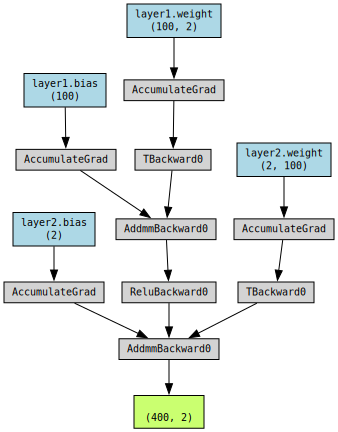

In [8]:
dot = make_dot(y_pred, params=dict(model.named_parameters()))
dot

## Why 5 out_features in the hidden layer?

- The choice of 5 out_features (neurons) in the hidden layer is somewhat arbitrary and can be tuned based on the complexity of the problem and the amount of data available.
- More neurons can capture more complex patterns but also increase the risk of overfitting, especially with limited data.
- In practice, you would experiment with different architectures (number of layers and neurons) using validation data to find the best configuration for your specific task.

- We are taking our 2 raw inputs and expanding them into 5 "new" learned features.

- The Analogy: Imagine you have 2 raw reports. You hire 5 analysts (neurons) to read those reports and create 5 different interpretations.

    - Analyst 1 might focus on the interaction of the two.

    - Analyst 2 might focus only on high values of Education.

    - Analyst 3 might look for low Experience.

The Trade-off:

- Too few (e.g., 1): The model is too simple (Underfitting).

- Too many (e.g., 1000): The model is too complex, slow, and memorizes noise (Overfitting).

-  What would happen if you changed it to 10 or 20 neurons? Would the model perform better or worse? Try it out!


In [9]:
## Let's visualize our previous example again
## But for this, what we need is to end up with a PyTorch model that does regression
## So we need to modify our EconomistNet a bit

Xtr = scaler.transform(X_train)

X_train_tensor = torch.tensor(Xtr, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)


class EconomistNetReg(nn.Module):
    def __init__(self):
        super().__init__()
        hidden_features = 10
        # Define the layers (The "Ingredients")
        self.layer1 = nn.Linear(in_features=2, out_features=hidden_features)
        self.layer2 = nn.Linear(
            in_features=hidden_features, out_features=hidden_features
        )  # only 1 output for regression
        self.layer3 = nn.Linear(
            in_features=hidden_features, out_features=1
        )  # only 1 output for regression
        self.relu1 = nn.ReLU()
        self.relu2 = nn.ReLU()

    def forward(self, x):
        # Define the flow (The "Recipe")
        x = self.layer1(x)  # Input -> Hidden
        x = self.relu1(x)  # Non-linearity
        x = self.layer2(x)  # Hidden -> Output
        x = self.relu2(x)  # Non-linearity
        x = self.layer3(x)  # Hidden -> Output
        return x

    def predict(self, x_input):
        # 1. Handle Input: Convert numpy/lists to Float Tensor
        if not isinstance(x_input, torch.Tensor):
            x_input = torch.tensor(x_input, dtype=torch.float32)

        # 2. Evaluation Mode: Tells PyTorch "we are not training right now"
        # (This disables things like Dropout if you had them)
        self.eval()

        # 3. No Grad: Tells PyTorch "don't calculate calculus gradients"
        # (Makes it faster and saves memory)
        with torch.no_grad():
            prediction = self.forward(x_input)

        # 4. Return as Numpy array (easier for economists to work with)
        return prediction.numpy()


# 1. Setup Data (Assume X_train_tensor and y_train_tensor are already normalized!)
# Combine X and y into a single dataset
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)

# CREATE THE DATALOADER (The Magic Fix)
# - batch_size=64: Look at 64 people at a time (Standard industry practice)
# - shuffle=True:  Randomize order every time (Prevents patterns based on row order)
train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)

# 2. Setup Model
model = EconomistNetReg()
criterion = nn.MSELoss()

# USE ADAM (The better driver)
# weight_decay=1e-4 mimics sklearn's 'alpha' (L2 regularization) to prevent overfitting
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=1e-4)

# 3. The Mini-Batch Training Loop
print("Training...")
for epoch in range(500):  # Number of times to loop through the WHOLE dataset
    for X_batch, y_batch in train_loader:
        # A. Forward
        predictions = model(X_batch)
        loss = criterion(predictions, y_batch)

        # B. Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch} | Loss: {loss.item():.5f}")


Training...
Epoch 0 | Loss: 2.15349
Epoch 100 | Loss: 0.42064
Epoch 200 | Loss: 0.29374
Epoch 300 | Loss: 0.32638
Epoch 400 | Loss: 0.30761


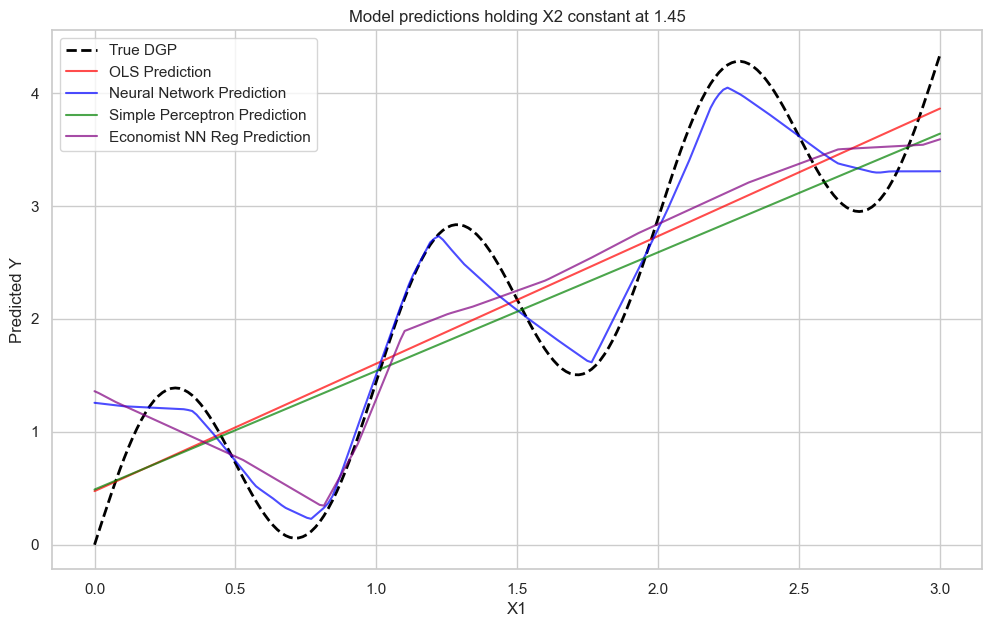

In [10]:
# Create a grid for plotting
x1_grid = np.linspace(0, 3, 200)
x2_fixed = np.mean(X["X2"])

# Prepare inputs
plot_df = pd.DataFrame({"X1": x1_grid, "X2": [x2_fixed] * 200})
plot_X_scaled = scaler.transform(plot_df)

y_pred_econ_nn = model.predict(plot_X_scaled)

# Predictions
plot_df["OLS_Pred"] = mod_ols.predict(plot_df)
plot_df["NN_Pred"] = nn_reg.predict(plot_X_scaled)
plot_df["Perceptron_Pred"] = perceptron.predict(plot_df[["X1", "X2"]].values)
plot_df["Econ_NN_Pred"] = y_pred_econ_nn
plot_df["True_Function"] = (plot_df["X1"] * plot_df["X2"]) + np.sin(
    2 * np.pi * plot_df["X1"]
)

# Plotting

plt.figure(figsize=(12, 7))
plt.plot(
    plot_df["X1"],
    plot_df["True_Function"],
    label="True DGP",
    color="black",
    linestyle="--",
    linewidth=2,
)
plt.plot(
    plot_df["X1"], plot_df["OLS_Pred"], label="OLS Prediction", color="red", alpha=0.7
)
plt.plot(
    plot_df["X1"],
    plot_df["NN_Pred"],
    label="Neural Network Prediction",
    color="blue",
    alpha=0.7,
)
plt.plot(
    plot_df["X1"],
    plot_df["Perceptron_Pred"],
    label="Simple Perceptron Prediction",
    color="green",
    alpha=0.7,
)
plt.plot(
    plot_df["X1"],
    plot_df["Econ_NN_Pred"],
    label="Economist NN Reg Prediction",
    color="purple",
    alpha=0.7,
)

plt.title(f"Model predictions holding X2 constant at {x2_fixed:.2f}")
plt.xlabel("X1")
plt.ylabel("Predicted Y")
plt.legend()
plt.show()

## More and More Complicated Networks

- Neural networks can get very complex very quickly.
- You can add more layers, different types of layers (Convolutional, Recurrent), and various architectures (ResNet, Transformers).
- However, the core principles remain the same: forward propagation, backpropagation, and optimization.
- Let's take an example of a neural network that is used for synthetic data generation, such as a Generative Adversarial Network (GAN).
- How would that look like in `PyTorch`?


## LSTM (Long Short-Term Memory)

- The Problem with Standard Feedforward Nets: They have no "memory." 
    - They assume observation $t$ is independent of observation $t-1$.
    - Standard RNNs (Recurrent Neural Nets) try to remember but suffer from "short-term memory" (Vanishing Gradient problem).
- The LSTM Solution:
    - A "gating" mechanism that decides what to keep, what to forget, and what to pass forward.
    - Like an optimizing agent: "Is this past shock permanent (keep) or transitory (forget)?"

## How does LSTM work?

- Let's go through an example of how an LSTM cell processes data at each time step.
- The Scenario: Predicting Next Quarter's Inflation
- Let's imagine a simplified world. We want to predict inflation for Quarter 4 based on data from Quarters 1, 2, and 3.
- The Data Point (A Sequence): Our single data point is a 3-quarter sequence history.
- Sequence Length (Time steps): 3
- Features per step: 2 (Interest Rate, Unemployment Rate)
- Let's define our input data tensor 

```
X = [
  - [2.5, 4.0],  # t=1 (Q1): Low rates, low unemployment (Boom times)
  - [3.5, 3.9],  # t=2 (Q2): Rates hiked, unemployment steady (Cooling?)
  - [4.5, 4.2]   # t=3 (Q3): Rates high, unemployment rising (Trouble ahead?)
]
```

The LSTM's Internal "Brain":
- Hidden Dimension Size: 2. This means the LSTM summarizes its entire knowledge about the world into a vector of 2 numbers.
- The Two Memories:
    - Cell State ($C_t$): The Long-Term Memory. 
        - It carries broad trends across many time steps.
    - Hidden State ($h_t$): The Working Memory / Current Output. 
        - It represents the model's immediate "feeling" about the current situation based on recent news and the long-term trend.

## Time Step 0:  Initialization

- Before the model sees the first quarter's data, its mind is blank.
- Initial Cell State ($C_0$): [0.0, 0.0] (No long-term trends established).
- Initial Hidden State ($h_0$): [0.0, 0.0] (No immediate opinion).

## Time Step 1: Quarter 1 Data

- Input: Current Data ($x_1$): [2.5, 4.0] (Low rates, low unemployment)
- Context: Previous states $C_0$, $h_0$ (The blanks).
- What happens inside the LSTM cell:
    - The Combine: The LSTM concatenates current input $x_1$ and previous working memory $h_0$. 
        - "I have no history, but current data looks like boom times.
    - The Gates:
        - Forget Gate: Decides what to drop from long-term memory $C_0$. Since $C_0$ is empty, nothing happens here yet.
        - Input Gate: Decides how important this new Q1 data is. 
            - "This is very important baseline information."
        - Update Memories:
            - Cell State Update ($C_0 \to C_1$): The long-term memory is updated from blank to store a "Boom context." 
            - Let's represent this conceptually as vector [0.8, 0.1] (High growth signal, low risk signal).
            - Hidden State Update ($h_0 \to h_1$): The model creates its immediate working memory based on this new long-term context. 
                - $h_1$ becomes [0.7, 0.2].
- End of T=1 Status: The model thinks the economy is strong.

![](figures/Gemini_Generated_Image_qsk79sqsk79sqsk7.png)

## Time Step 2: Quarter 2 Data

- Input: Current Data ($x_2$): [3.5, 3.9] (Rates hiked, unemployment steady)
- Context: Previous states $C_1$: [0.8, 0.1], $h_1$: [0.7, 0.2].
- What happens inside the LSTM cell:
    - It sees rates are rising ($x_2$) BUT it remembers from $h_1$ that things were booming.
    - The Gates:
    - Forget Gate: The model's weights might determine that rate hikes usually dampen booms. 
        - It might "slightly forget" the strong growth signal from Q1. 
        - The Forget gate outputs something like [0.8, 1.0]. 
        - We multiply the old long-term memory $C_1$ by this. 
        - The growth signal drops from 0.8 to 0.8 * 0.8 = 0.64.
    - Input Gate: How important is this rate hike? Very. 
        - It decides to add a "cooling signal" to the long-term memory.
    - Update Memories:
        - Cell State Update ($C_1 \to C_2$): The boom signal is dampened, a cooling signal is added. 
            - New long-term memory $C_2$ is conceptually [0.6, 0.4] (Growth slowing, risk rising).
        - Hidden State Update ($h_1 \to h_2$): The working memory is updated to reflect this change. 
            - $h_2$ becomes [0.5, 0.5].
- End of T=2 Status: The model's internal narrative has shifted from "Boom" to "Uncertainty/Cooling."

## Time Step 3: Quarter 3 Data

- Input: Current Data ($x_3$): [4.5, 4.2] (Rates high, unemployment rising)
- Context: Previous states $C_2$: [0.6, 0.4], $h_2$: [0.5, 0.5].
- What happens inside the LSTM cell:
    - It sees unemployment finally ticking up ($x_3$) and combines it with the previous feeling of uncertainty ($h_2$).
    - The Gates: 
        - Forget Gate: It might heavily "forget" the remaining growth signals from Q1/Q2.
        - Input Gate: It strongly incorporates the rising unemployment as a major risk factor.
        - Update Memories:Cell State Update ($C_2 \to C_3$): 
            - The long-term memory now heavily reflects the accumulated evidence of a downturn. 
            - $C_3$ is conceptually [0.2, 0.9] (Low growth signal, high risk signal).
        - Hidden State Update ($h_2 \to h_3$): The final working memory is produced. $h_3$ becomes [0.1, 0.95].
- End of T=3 Status: The LSTM has finished reading the sequence. Its final Hidden State ($h_3$) is a summarized vector representing "High probability of downturn based on the trajectory of the last 3 quarters."

## Application: Macroeconomic Forecasting

- Data: Quarterly GDP, Inflation, Interest Rates (1950–2024).
- Why LSTM?
    -It captures long-term dependencies (e.g., the lingering effect of a policy change 5 years ago).
    - It handles non-linear interactions between lagged variables better than VAR (Vector Autoregression).
        - Example: Predicting Recession Probabilities
        - Input: Sequence of last 12 months' yield curve spreads.
        - Output: Probability of recession in $t+1$.


In [11]:
## LSTM Network
## Or use nn.LSTM from PyTorch directly

## We use sigmoid and tanh activations to mimic the original LSTM paper
## Why Sigmoid?
## - Do we let the information in or not? (0 to 1 decision)
## Why: In the Forget, Input, and Output gates, we need to make a binary-like decision: let information through, or block it.
## Multiply by 0: The gate is closed (block information).
## Multiply by 1: The gate is fully open (pass information).
## Multiply by 0.5: Let half the information through.
## Sigmoid is perfect for this gating role.
## Why Tanh?
## - Scale information between -1 and 1 (helps with gradients)
# Directionality (Positive and Negative): When updating a long-term memory, you need the ability to add to it (positive significance) or subtract from it (negative significance).
# If we used Sigmoid here (output 0 to 1), we could only ever increase the values in our memory cell.
# If we use Tanh (output -1 to 1), the model can learn to positively reinforce a memory (e.g., +0.8) or negatively adjust it (e.g., -0.5).
# Economic Analogy: Sigmoid only allows deposits. Tanh allows both deposits (+) and withdrawals (-).

import torch
import torch.nn as nn
import math


class CustomLSTM(nn.Module):
    def __init__(self, input_sz, hidden_sz):
        super().__init__()
        self.input_sz = input_sz
        self.hidden_sz = hidden_sz

        # --- The 4 "Brains" of the LSTM ---
        # Each gate needs weights for the Input (x) and weights for the Previous Hidden State (h)

        # 1. Forget Gate: "Should I forget the previous macro trend?"
        self.W_f = nn.Linear(input_sz + hidden_sz, hidden_sz)

        # 2. Input Gate: "Is this new data point significant?"
        self.W_i = nn.Linear(input_sz + hidden_sz, hidden_sz)

        # 3. Cell Candidate: "What is the new information?"
        self.W_c = nn.Linear(input_sz + hidden_sz, hidden_sz)

        # 4. Output Gate: "What should I predict for this quarter?"
        self.W_o = nn.Linear(input_sz + hidden_sz, hidden_sz)

        self.init_weights()

    def init_weights(self):
        stdv = 1.0 / math.sqrt(self.hidden_sz)
        for module in self.modules():
            if isinstance(module, nn.Linear):
                module.weight.data.uniform_(-stdv, stdv)
                module.bias.data.uniform_(-stdv, stdv)

    def forward_step(self, x, hidden_state, cell_state):
        """
        Processing ONE time step (e.g., one quarter of GDP data).
        """
        # Concatenate Input (x) and Previous Hidden State (h)
        # This allows the model to make decisions based on both current news and past context.
        combined = torch.cat((x, hidden_state), dim=1)

        # --- A. Calculate the Gates ---

        # f_t: Forget Gate (Sigmoid -> output between 0 and 1)
        # If 0: Completely forget past history. If 1: Keep it all.
        f_t = torch.sigmoid(self.W_f(combined))

        # i_t: Input Gate (Sigmoid)
        # If 0: Ignore this new data. If 1: Pay full attention.
        i_t = torch.sigmoid(self.W_i(combined))

        # c_tilde: Candidate Memory (Tanh -> output between -1 and 1)
        # This is the raw new information extracted from x.
        c_tilde = torch.tanh(self.W_c(combined))

        # o_t: Output Gate (Sigmoid)
        # Controls how much of the internal state is exposed as the prediction.
        o_t = torch.sigmoid(self.W_o(combined))

        # --- B. Update States ---

        # New Cell State (The Long-Term Memory)
        # logic: (old_memory * forget_factor) + (new_info * input_factor)
        new_cell_state = (cell_state * f_t) + (c_tilde * i_t)

        # New Hidden State (The Working Memory / Output)
        new_hidden_state = o_t * torch.tanh(new_cell_state)

        return new_hidden_state, new_cell_state

    def forward(self, x):
        """
        Processing the WHOLE sequence.
        x shape: (batch_size, sequence_length, input_sz)
        """
        batch_size, seq_len, _ = x.size()

        # Initialize Hidden (h) and Cell (C) states to zeros
        h_t = torch.zeros(batch_size, self.hidden_sz).to(x.device)
        c_t = torch.zeros(batch_size, self.hidden_sz).to(x.device)

        hidden_states_history = []

        # Loop through the sequence (Time)
        for t in range(seq_len):
            x_t = x[:, t, :]  # Get data for time step t

            h_t, c_t = self.forward_step(x_t, h_t, c_t)

            hidden_states_history.append(h_t.unsqueeze(1))

        # Stack results to return shape (batch_size, sequence_length, hidden_sz)
        return torch.cat(hidden_states_history, dim=1)


# --- Verification ---
# Let's test it with dummy economic data
batch_size = 5
seq_len = 10  # 10 quarters of history
features = 3  # Inflation, Unemployment, Interest Rate
hidden_dim = 20

model = CustomLSTM(features, hidden_dim)
dummy_input = torch.randn(batch_size, seq_len, features)

output = model(dummy_input)
print(f"Input shape: {dummy_input.shape}")
print(f"Output shape: {output.shape}")  # Should be [5, 10, 20]

Input shape: torch.Size([5, 10, 3])
Output shape: torch.Size([5, 10, 20])


## An Example: Predicting Recessions

- Let's get some data from FRED (Federal Reserve Economic Data) on yield curves and recessions.
- We will build a neural network to predict the probability of a recession based on the yield curve spread.
- We'll use `nn.LSTM` for sequential data 

In [12]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import geopandas as gpd
from pathlib import Path

# --- Configuration ---
SEQ_LENGTH = 12  # Look back at the last 12 months of data
FORECAST_HORIZON = 6  # Try to predict a recession 6 months into the future
HIDDEN_DIM = 32  # LSTM hidden state size
BATCH_SIZE = 64
EPOCHS = 50
LR = 0.001  # Learning Rate

# --- 1. Get Data from FRED ---
start_date = datetime.datetime(1970, 1, 1)
end_date = datetime.datetime.today()

print("Downloading data from FRED...")
# T10Y2Y: 10-Year minus 2-Year Treasury Yield Spread
# UNRATE: Unemployment Rate
# INDPRO: Industrial Production Index
# USREC: NBER based Recession Indicators (The Target)
indicators = ["T10Y2Y", "UNRATE", "INDPRO", "USREC"]
df = web.DataReader(indicators, "fred", start_date, end_date)

# --- 2. Data Cleaning ---
# FRED data often has mismatching dates or missing values at the start/end.
df = df.resample("MS").first()  # Ensure frequency is Month Start (MS)
df = df.dropna()  # Drop rows with any missing values

# --- 3. Target Engineering (Crucial Step) ---
# We want to predict if a recession will happen *in the future*.
# We shift the USREC column backwards by the forecast horizon.
# If today is Jan 2020, the target is the actual recession status of July 2020.
df["Target_Next_6M"] = df["USREC"].shift(-FORECAST_HORIZON)
df = df.dropna()  # Drop the last few months where we don't know the future yet

# Separate features and target
feature_cols = ["T10Y2Y", "UNRATE", "INDPRO"]
data_X = df[feature_cols].values
data_y = df["Target_Next_6M"].values

# --- 4. Splitting and Scaling ---
# Important: Split chronologically, not randomly!
train_size = int(len(data_X) * 0.80)
test_size = len(data_X) - train_size

train_X_raw, test_X_raw = data_X[0:train_size], data_X[train_size : len(data_X)]
train_y_raw, test_y_raw = data_y[0:train_size], data_y[train_size : len(data_y)]

# Scale the features (LSTMs hate unscaled data)
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X_raw)
test_X_scaled = scaler.transform(test_X_raw)  # Use train scaler on test data


# --- 5. Sequence Creation Function ---
# LSTMs need 3D input: [Batch Size, Sequence Length, Number of Features]
# We slide a window over the 2D data to create these sequences.
def create_sequences(data_X, data_y, seq_length):
    xs, ys = [], []
    for i in range(len(data_X) - seq_length):
        x_chunk = data_X[i : (i + seq_length)]
        y_chunk = data_y[
            i + seq_length
        ]  # The target is immediately after the sequence ends
        xs.append(x_chunk)
        ys.append(y_chunk)
    return np.array(xs), np.array(ys)


# Create sequences
train_X_seq, train_y_seq = create_sequences(train_X_scaled, train_y_raw, SEQ_LENGTH)
test_X_seq, test_y_seq = create_sequences(test_X_scaled, test_y_raw, SEQ_LENGTH)

# Convert to PyTorch Tensors
train_data = TensorDataset(
    torch.from_numpy(train_X_seq).float(), torch.from_numpy(train_y_seq).float()
)
test_data = TensorDataset(
    torch.from_numpy(test_X_seq).float(), torch.from_numpy(test_y_seq).float()
)

train_loader = DataLoader(train_data, shuffle=False, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_data, shuffle=False, batch_size=BATCH_SIZE)

print("Data preparation complete.")
print(
    f"Training shape: {train_X_seq.shape}"
)  # e.g., (450 samples, 12 months lookback, 3 features)

Data preparation complete.
Training shape: (458, 12, 3)


In [13]:
df

,T10Y2Y,UNRATE,INDPRO,USREC,Target_Next_6M
DATE,,,,,
1976-06-01,0.68,7.6,43.9637,0.0,0.0
1976-07-01,0.86,7.8,44.2141,0.0,0.0
1976-08-01,1.10,7.8,44.5182,0.0,0.0
1976-09-01,1.14,7.6,44.6721,0.0,0.0
1976-10-01,1.25,7.7,44.6585,0.0,0.0
...,...,...,...,...,...
2025-01-01,0.32,4.0,100.0647,0.0,0.0
2025-02-01,0.28,4.2,101.0993,0.0,0.0
2025-03-01,0.20,4.2,101.0404,0.0,0.0


In [14]:
train_X_seq

array([[[-0.29638074,  0.73642619, -1.59746635],
        [-0.10723009,  0.8642874 , -1.58448965],
        [ 0.14497079,  0.8642874 , -1.56873001],
        ...,
        [ 0.38666329,  0.60856497, -1.44951952],
        [ 0.47073025,  0.48070376, -1.42620395],
        [ 0.35513818,  0.35284254, -1.40688919]],

       [[-0.10723009,  0.8642874 , -1.58448965],
        [ 0.14497079,  0.8642874 , -1.56873001],
        [ 0.18700426,  0.73642619, -1.56075431],
        ...,
        [ 0.47073025,  0.48070376, -1.42620395],
        [ 0.35513818,  0.35284254, -1.40688919],
        [ 0.18700426,  0.48070376, -1.38768843]],

       [[ 0.14497079,  0.8642874 , -1.56873001],
        [ 0.18700426,  0.73642619, -1.56075431],
        [ 0.30259633,  0.8003568 , -1.56145912],
        ...,
        [ 0.35513818,  0.35284254, -1.40688919],
        [ 0.18700426,  0.48070376, -1.38768843],
        [ 0.27107122,  0.28891194, -1.38450645]],

       ...,

       [[ 1.32190819, -0.09467171,  1.43008002],
        [ 1

## The Economic Theory Base

We will use a simple but powerful set of leading indicators:

The Yield Curve Spread (T10Y2Y): The difference between the 10-Year Treasury rate and the 2-Year Treasury rate. When this goes negative (inverts), a recession may follow within 6-18 months.

Unemployment Rate (UNRATE): A key measure of labor market health.

The Target (USREC): The NBER defined recession indicator (1 = Recession, 0 = Expansion).

In [15]:
# --- 6. Define the LSTM Model ---
class RecessionLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim=1, num_layers=1):
        super(RecessionLSTM, self).__init__()

        self.hidden_dim = hidden_dim
        # Using the optimized nn.LSTM
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)

        # Final layer to output a probability between 0 and 1
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # x shape: [batch_size, seq_len, input_dim]
        lstm_out, (hn, cn) = self.lstm(x)

        # We only want the output from the LAST time step in the sequence
        last_time_step_out = lstm_out[:, -1, :]

        out = self.fc(last_time_step_out)
        out = self.sigmoid(out)  # Squash to probability [0,1]
        return out


# Instantiate Model
input_dim = len(feature_cols)  # 3 features
model = RecessionLSTM(input_dim=input_dim, hidden_dim=HIDDEN_DIM)
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for yes/no classification
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# --- 7. Training Loop ---
print("\nStarting Training...")
model.train()
for epoch in range(EPOCHS):
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()

        y_pred = model(X_batch)
        # Ensure y_batch is the right shape [batch_size, 1] for BCELoss
        loss = criterion(y_pred, y_batch.unsqueeze(1))

        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{EPOCHS}, Loss: {epoch_loss / len(train_loader):.4f}")

print("Training finished.")


Starting Training...
Epoch 10/50, Loss: 0.2933
Epoch 20/50, Loss: 0.2256
Epoch 30/50, Loss: 0.2130
Epoch 40/50, Loss: 0.2038
Epoch 50/50, Loss: 0.1914
Training finished.


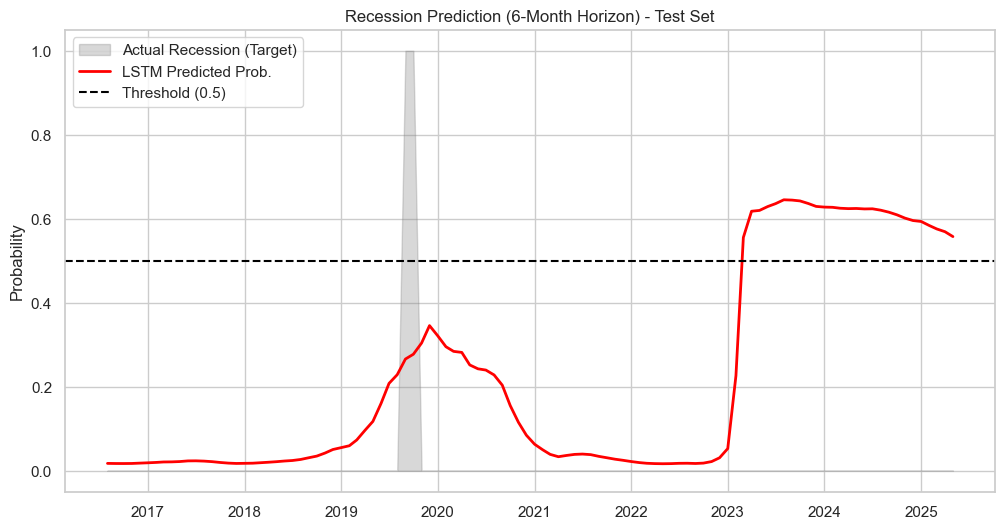

In [16]:
# --- 8. Evaluation ---
model.eval()  # Set to evaluation mode
predictions = []
actuals = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        y_pred = model(X_batch)
        predictions.append(y_pred.numpy())
        actuals.append(y_batch.numpy())

# Flatten the lists
flat_preds = np.concatenate(predictions).flatten()
flat_actuals = np.concatenate(actuals).flatten()

# Create results dataframe based on test dates
test_dates = df.index[train_size + SEQ_LENGTH :]
results_df = pd.DataFrame(
    {"Actual_Recession_6M_Ahead": flat_actuals, "Predicted_Probability": flat_preds},
    index=test_dates,
)

# Plotting
plt.figure(figsize=(12, 6))
plt.title(f"Recession Prediction ({FORECAST_HORIZON}-Month Horizon) - Test Set")

# Plot actual recessions as gray shaded areas
plt.fill_between(
    results_df.index,
    results_df["Actual_Recession_6M_Ahead"],
    color="gray",
    alpha=0.3,
    label="Actual Recession (Target)",
)

# Plot predicted probability
plt.plot(
    results_df.index,
    results_df["Predicted_Probability"],
    color="red",
    linewidth=2,
    label="LSTM Predicted Prob.",
)

# Add a threshold line (e.g., if probability > 0.5, predict recession)
plt.axhline(y=0.5, color="black", linestyle="--", label="Threshold (0.5)")

plt.ylabel("Probability")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()


## CNN (Convolutional Neural Networks)

- The Problem:
    - Images (satellite photos, charts) are huge matrices of numbers.
    - A standard neural net tries to connect every pixel to every neuron $\rightarrow$ 
        - Overfitting nightmare.
        - The CNN Solution:
            - Filters (Convolutions): Instead of looking at the whole image, look at small 3x3 patches.
            - Parameter Sharing: Use the same "edge detector" filter across the whole image.
            - Invariance: A factory is a factory, whether it's in the top-left or bottom-right of the image.

## "Remote Sensing" & Poverty Estimation

- Data: Satellite Night Lights (Nighttime Luminosity) or Daytime Satellite Imagery.
- Why CNN?
    - Standard regressions can't "see" a road or a roof type.
    - CNNs can learn features like "metal roof vs. thatched roof" which correlates with household wealth.
- Research Frontier:
    - Nowcasting Trade: Counting trucks/ships in satellite images to estimate real-time trade flows.

## What does a CNN do exactly?

- The code for a CNN does not look very different from a standard neural network.
- The key difference is the use of `nn.Conv2d` layers instead of `nn.Linear` layers.
- These convolutional layers apply filters to the input images to extract spatial features before passing them to fully connected layers for final prediction.
- What does `nn.Conv2d` do?
    - It slides a small filter (e.g., 3x3) over the image.
    - At each position, it computes a weighted sum of the pixel values covered by the filter.
    - This produces a feature map that highlights specific patterns (like edges, textures) in the image.
    - The number of `out_features` determines how many different filters (patterns) the CNN learns to detect.

## Phase 1

- When you first create the model (model = NightLightsCNN()), PyTorch fills those `kernel_size`x`kernel_size` filters with random garbage numbers.
    - Suppose kernel_size = 3, out_features = 3.
    - Filter 1 might look like static noise.
    - Filter 2 might look like a checkerboard.
    - Filter 3 might be all zeros.
- The Result: The model scans the Night Lights image with garbage filters. It outputs a prediction: "GDP is $5."
- The Reality: The actual GDP is $10 billion.
- The Error (Loss): Huge.

## Phase 2 (Backpropagation)

- The model realizes it made a massive error. 
- It uses calculus (Backpropagation) to look backwards through the network and ask: "Who is responsible for this failure?"
- It looks at Filter 1 (the random noise). 
    - It asks: "If I slightly change the numbers in this filter to look more like a straight line, would my GDP prediction have been better?"
- Mathematical Answer: YES.
- Why? Because in the training data, high GDP regions often have straight lines (highways). The random filter missed them.
- The Update: The optimizer (Adam) slightly nudges the numbers in Filter 1 to look 1% more like a line detector.

## Phase 3 

- The model repeats this process 10,000 times (Epochs).
- Filter 1 (The Road Candidate): Every time Filter 1 detects a straight line, the model's GDP prediction gets more accurate. The math "rewards" Filter 1 by making its weights sharper and more defined. It becomes a Highway Detector.
- Filter 2 (The Useless One): Maybe Filter 2 started checking for "random zig-zags." The model realizes that "random zig-zags" have zero correlation with GDP.
    - The math says: "You are useless. Detecting zig-zags doesn't help minimize the error."
    - Filter 2 might slowly drift into becoming something else (like a "Coastline Detector") because that does help reduce error.
- Filter 3 can't find anything useful, so it becomes a "Zero Detector" (all weights go to zero).

## First let's get the data from gee

- We'll load satellite imagery data using Google Earth Engine (GEE) Python API for a given time period
- Then slice it up by regions of interest (ROIs) corresponding to survey locations with known poverty levels
- Then load it into a PyTorch DataLoader for training a CNN to predict poverty levels based on the images
- Then we'll get GDP data from the World Bank API to compare our model's predictions against official statistics

In [17]:
import ee
import geemap
from dotenv import load_dotenv
from PIL import Image
from pathlib import Path
import rasterio
from torchvision import transforms

load_dotenv()
ee.Authenticate()
ee.Initialize()

/Users/lordflaron/Documents/ec34-ds-for-econ/.venv/lib/python3.10/site-packages/google/api_core/_python_version_support.py:275: FutureWarning: You are using a Python version (3.10.19) which Google will stop supporting in new releases of google.api_core once it reaches its end of life (2026-10-04). Please upgrade to the latest Python version, or at least Python 3.11, to continue receiving updates for google.api_core past that date.
  warnings.warn(message, FutureWarning)


In [18]:
def mask_high_quality_night(image):
    qa = image.select("QF_Cloud_Mask")

    # 1. Bit 0: Check if it is Night (0)
    # Shift right by 0, bitwise AND with 1, check if equal to 0
    is_night = qa.bitwiseAnd(1).eq(0)

    # 2. Bits 4-5: Check if Quality is High (3)
    # Shift right by 4, bitwise AND with 3 (binary 11), check if equal to 3
    is_high_quality = qa.rightShift(4).bitwiseAnd(3).eq(3)

    # 3. Bits 6-7: Check if Confident Clear (0)
    # Shift right by 6, bitwise AND with 3 (binary 11), check if equal to 0
    is_clear = qa.rightShift(6).bitwiseAnd(3).eq(0)

    # 4. Bit 9: Check if no Cirrus (0)
    # Shift right by 9, bitwise AND with 1, check if equal to 0
    no_cirrus = qa.rightShift(9).bitwiseAnd(1).eq(0)

    # Combine all conditions
    mask = is_night.And(is_high_quality).And(is_clear).And(no_cirrus)
    return image.updateMask(mask)


ntl = (
    ee
    .ImageCollection("NASA/VIIRS/002/VNP46A2")
    .filter(ee.Filter.date("2023-01-01", "2023-12-31"))
    .map(mask_high_quality_night)  # apply our custom mask
    .mosaic()  # put images all together
    .select("Gap_Filled_DNB_BRDF_Corrected_NTL")  # select the NTL band
)

## Download tif of each county's NTL data
# ## Now let's keep it to only the US
countries = ee.FeatureCollection("USDOS/LSIB_SIMPLE/2017")
us = countries.filter(ee.Filter.eq("country_na", "United States"))
ntl_us = ntl.clip(us)

# ## Now let's break it up by county
counties = ee.FeatureCollection("TIGER/2018/Counties")
counties_us = counties.filter(
    ee.Filter.eq("STATEFP", "00").Not()
)  # remove US aggregate

county_ids = counties_us.aggregate_array("GEOID").getInfo()
county_names = counties_us.aggregate_array("NAME").getInfo()
state_names = counties_us.aggregate_array("STATEFP").getInfo()

# for county_id, county_name in zip(county_ids, county_names):  # this loop takes a while
#     print(county_id, county_name)
#     county = counties_us.filter(ee.Filter.eq('GEOID', county_id)).first()

#     if Path(f"data/county_tifs/ntl_county_{county_id}.tif").exists():
#         print(f"File for county {county_id} already exists. Skipping download.")
#         continue
#     geemap.ee_export_image(
#         ntl_us.clip(county),
#         filename=f"data/county_tifs/ntl_county_{county_id}.tif",
#         scale=500,
#         region=county.geometry(),
#         file_per_band=False
#     )

In [19]:
county_names[np.where(np.array(county_ids) == "51530")[0][0]]

'Buena Vista'

In [20]:
## Now let's get the gdp data and clean it and make it long
gdp = (
    pd
    .read_excel("data/CAGDP1__ALL_AREAS_2001_2023.xlsx", header=1)
    .assign(GeoFIPS=lambda df: df["GeoFIPS"].str.replace('"', ""))
    .query(
        "Unit not in ['Quantity index', 'Thousands of dollars']"
    )  # only keep real gdp
    .query("GeoName != 'United States'")  # remove US aggregate
    .query("not GeoFIPS.str.endswith('000')")  # remove state aggregates
    .drop(
        [
            "TableName",
            "LineCode",
            "Unit",
            "IndustryClassification",
            "Description",
            "Region",
        ],
        axis=1,
    )  # drop variables we don't want
    .set_index(["GeoFIPS", "GeoName"])
    .stack()  # make long
    .to_frame()
    .rename({0: "real_gdp"}, axis=1)
    .reset_index()
    .rename({"level_2": "year"}, axis=1)
    .query("year == 2013")  # keep only 2013 for merging with NTL
)

gdp

,GeoFIPS,GeoName,year,real_gdp
12,01001,"Autauga, AL",2013,1618151
35,01003,"Baldwin, AL",2013,6314704
58,01005,"Barbour, AL",2013,841037
81,01007,"Bibb, AL",2013,409987
104,01009,"Blount, AL",2013,930928
...,...,...,...,...
71611,56037,"Sweetwater, WY",2013,4055219
71634,56039,"Teton, WY",2013,2090841
71657,56041,"Uinta, WY",2013,966919
71680,56043,"Washakie, WY",2013,397296


In [42]:
gdp.query("GeoName.str.contains('Phila')")

,GeoFIPS,GeoName,year,real_gdp
52866,42101,"Philadelphia, PA",2013,102753184


In [35]:
IMAGE_SIZE = 64  # CNN input size (64x64 pixels)

# --- 1. Load and Merge Data ---
print("Loading data...")

# Load Shapes
# Ensure it includes the 'GEOID' or 'FIPS' column to match with GDP data

# print(f"Matched {len(full_data)} counties with GDP data.")

print("Processing images (this may take a moment)...")

X_list = []
y_list = []

# Define a standard PyTorch transform
transform = transforms.Compose([
    transforms.ToTensor(),  # Converts 0-255 PIL image to 0.0-1.0 Tensor
])

for i, tif_path in enumerate(Path("data/county_tifs").glob("*.tif")):
    src = rasterio.open(tif_path).read(1)
    county_id = tif_path.stem.split("_")[-1]

    # gdp for that id
    gdp_value = gdp.loc[gdp["GeoFIPS"] == county_id, "real_gdp"].values
    if len(gdp_value) == 0:
        print(f"No GDP data for county {county_id}, skipping.")
        continue
        # raise Exception(f"No GDP data for county {county_id}.")

    # Convert to PIL Image to easily resize
    img = Image.fromarray(src)

    # Resize to fixed dimensions (CNN requirement)
    img = img.resize((IMAGE_SIZE, IMAGE_SIZE), Image.BILINEAR)

    # Convert to PyTorch Tensor [1, 64, 64]
    tensor_img = transform(img)

    X_list.append(tensor_img)
    y_list.append(np.log(gdp_value[0]))

    if i % 100 == 0:
        print(f"Processed {i} counties...")


# --- 4. Final PyTorch Tensors ---
# Stack list of tensors into one big batch tensor
X = torch.stack(X_list)  # Shape: [N, 1, 64, 64]
y = torch.tensor(y_list).float()  # Shape: [N]

# Log-transform GDP (Economic data is usually log-normal)
y = torch.log(y)

print("\n--- READY FOR PYTORCH ---")
print(f"Input X shape: {X.shape}")  # e.g., torch.Size([3050, 1, 64, 64])
print(f"Target y shape: {y.shape}")

Loading data...
Processing images (this may take a moment)...
Processed 0 counties...
No GDP data for county 51530, skipping.
No GDP data for county 51685, skipping.
Processed 100 counties...
No GDP data for county 15005, skipping.
No GDP data for county 51121, skipping.
No GDP data for county 72049, skipping.
No GDP data for county 51690, skipping.
No GDP data for county 72061, skipping.
No GDP data for county 72075, skipping.
No GDP data for county 51069, skipping.
Processed 200 counties...
No GDP data for county 72129, skipping.
No GDP data for county 72115, skipping.
No GDP data for county 72101, skipping.
No GDP data for county 72117, skipping.
No GDP data for county 72103, skipping.
No GDP data for county 72063, skipping.
No GDP data for county 72077, skipping.
No GDP data for county 72089, skipping.
Processed 300 counties...
No GDP data for county 51678, skipping.
No GDP data for county 69085, skipping.
No GDP data for county 51730, skipping.
No GDP data for county 51081, skippi

In [23]:
m = geemap.Map(center=[40, -100], zoom=4)

vis_params = {
    "min": 0,
    "max": 60,
    "palette": ["black", "blue", "purple", "cyan", "green", "yellow", "red"],
}
m.addLayer(ntl_us, vis_params)

m

Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], position='topright', tr…

## The Tricky Part

- Each of the geometries of the counties is a different size
- But PyTorch wants a tensor of shape (batch_size, channels, height, width)
- we know that channel is 1 (grayscale night lights)
- We know that batch size is number of counties
- But height and width vary by county because each takes up a different number of pixels depending on its area
- We need to standardize the size of each county's image data before feeding it into the CNN

![](figures/Gemini_Generated_Image_9bkp9g9bkp9g9bkp.png)

![](figures/Gemini_Generated_Image_9bkp9g9bkp9g9bkp%20(1).png)

![](figures/Gemini_Generated_Image_9bkp9g9bkp9g9bkp%20(2).png)

![](figures/Gemini_Generated_Image_ihb767ihb767ihb7.png)

In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


# --- 1. Define the CNN Architecture ---
class NightLightsCNN(nn.Module):
    def __init__(self):
        super(NightLightsCNN, self).__init__()

        # Convolutional Block 1
        # Input: 1 channel (Grayscale night lights), Output: 16 filters
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Reduces 32x32 -> 16x16

        # Convolutional Block 2
        self.conv2 = nn.Conv2d(
            in_channels=16, out_channels=32, kernel_size=3, padding=1
        )
        # Pool reduces 16x16 -> 8x8

        # Fully Connected Regressor
        # 32 channels * 8 * 8 pixels = 2048 inputs
        self.fc1 = nn.Linear(32 * 16 * 16, 128)
        self.fc2 = nn.Linear(128, 1)  # Output: Predicted Log GDP

    def forward(self, x):
        # x shape: [batch_size, 1, 32, 32]

        # Block 1
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)

        # Block 2
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)

        # Flatten for Linear Layer
        x = x.view(x.size(0), -1)

        # Regression Head
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)

        return x


Processing Data for CNN
Starting Training...
Epoch [5/20], Loss: 6.1077
Epoch [10/20], Loss: 5.2976
Epoch [15/20], Loss: 4.5409
Epoch [20/20], Loss: 3.8580


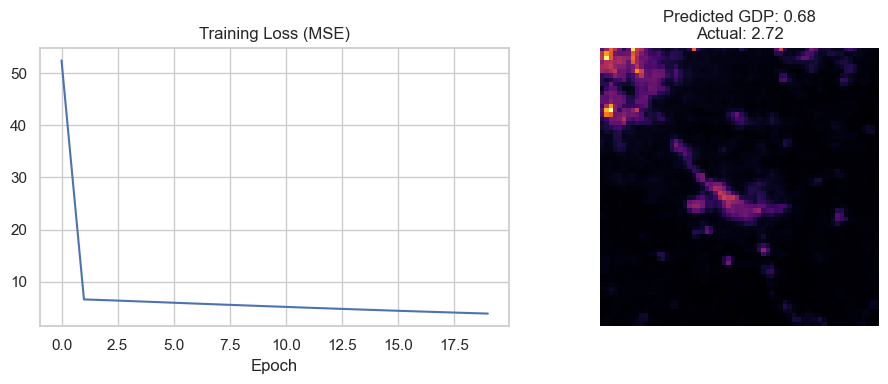

In [48]:
print("Processing Data for CNN")

# --- 2. Prepare Data ---
# Split into Train/Test (80/20 split)
num_samples = X.shape[0]
train_size = int(0.8 * num_samples)
test_size = num_samples - train_size

dataset = torch.utils.data.TensorDataset(X, y)

train_dataset, test_dataset = torch.utils.data.random_split(
    dataset, [train_size, test_size]
)

# Create DataLoader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

# --- 3. Train the Model ---
model = NightLightsCNN()
criterion = nn.MSELoss()  # Mean Squared Error for Regression
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("Starting Training...")
losses = []

for epoch in range(20):  # Train for 20 epochs
    epoch_loss = 0
    for images, targets in train_loader:
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, targets)

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(train_loader)
    losses.append(avg_loss)
    if (epoch + 1) % 5 == 0:
        print(f"Epoch [{epoch + 1}/20], Loss: {avg_loss:.4f}")

# --- 4. Visualize Results ---
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title("Training Loss (MSE)")
plt.xlabel("Epoch")

# Get test data
test_X, test_y = test_dataset[:]

# Show a sample prediction
model.eval()
with torch.no_grad():
    sample_img = test_X[0].unsqueeze(0)  # Get one image
    pred = model(sample_img).item()
    actual = test_y[0].item()

plt.subplot(1, 2, 2)
# Display the "Satellite Image"
plt.imshow(test_X[0].squeeze(), cmap="inferno")  # 'inferno' looks like heat/light
plt.title(f"Predicted GDP: {pred:.2f}\nActual: {actual:.2f}")
plt.axis("off")

plt.tight_layout()
plt.show()

## What did it to?



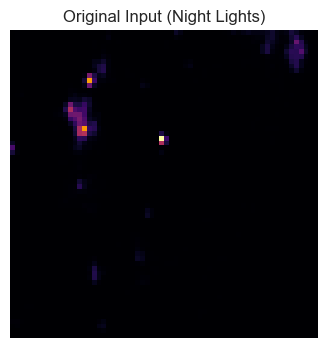

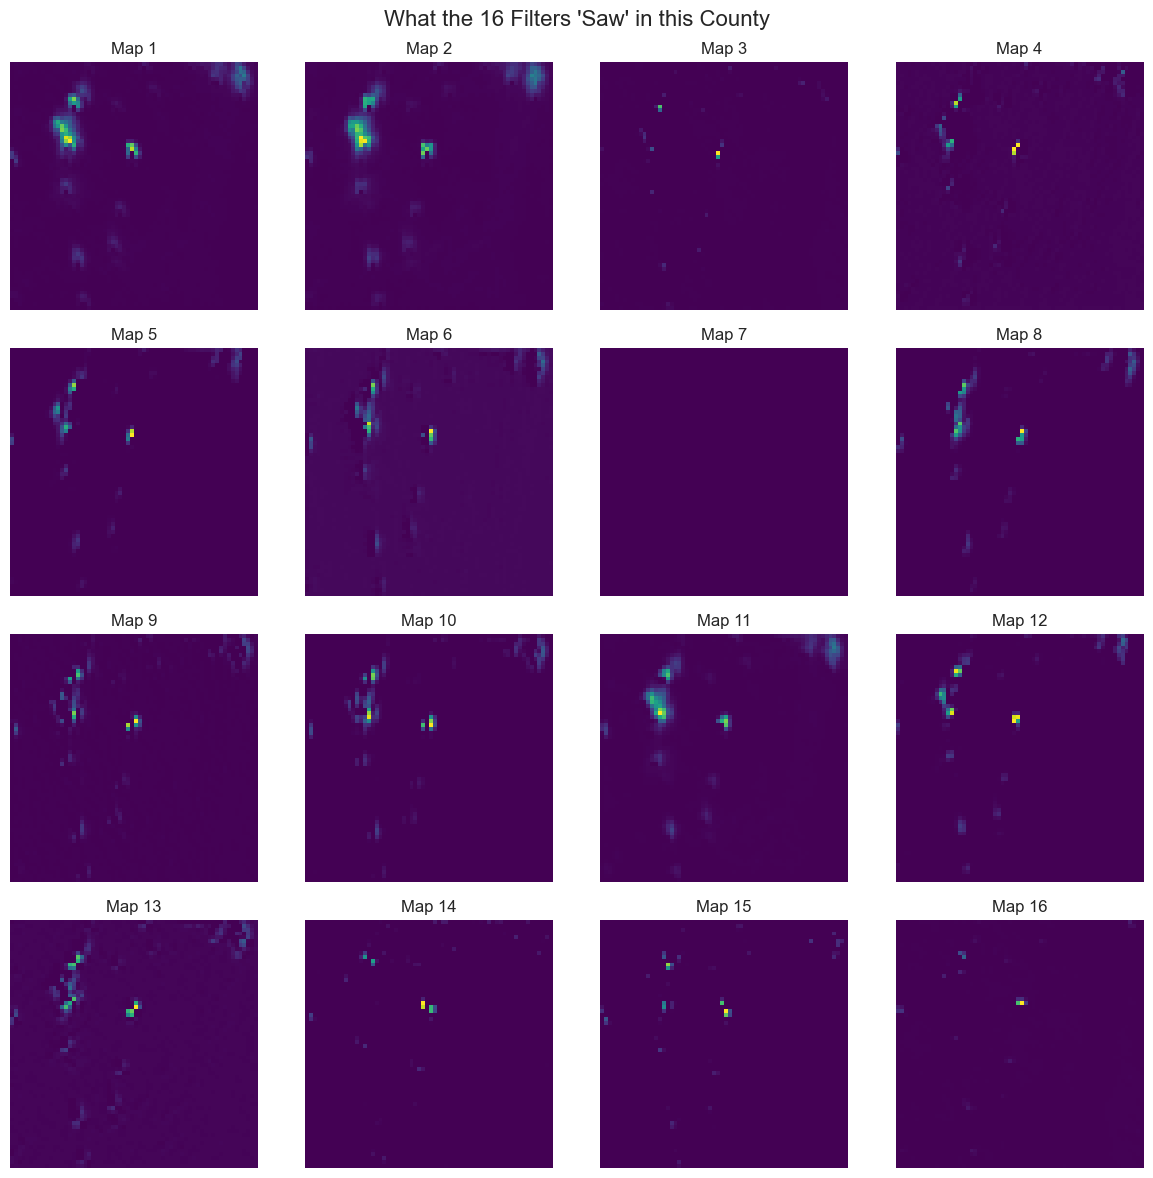

In [47]:
def visualize_feature_maps(model, single_image_tensor):
    # Ensure model is in eval mode (no gradients needed)
    model.eval()

    # 1. Pass the image through just the FIRST layer
    # We manually replicate the forward pass logic for just the first block
    with torch.no_grad():
        x = model.conv1(single_image_tensor.unsqueeze(0))  # Add batch dim
        x = model.relu(x)
        # We stop before pooling to see the high-res features
        feature_maps = x.squeeze(0).cpu().numpy()  # Remove batch dim -> [16, 32, 32]

    # 2. Plot the original image for reference
    plt.figure(figsize=(4, 4))
    plt.imshow(single_image_tensor.squeeze(), cmap="inferno")
    plt.title("Original Input (Night Lights)")
    plt.axis("off")
    plt.show()

    # 3. Plot the 16 Feature Maps
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))
    fig.suptitle("What the 16 Filters 'Saw' in this County", fontsize=16)

    for i, ax in enumerate(axes.flat):
        f_map = feature_maps[i, :, :]

        # 'viridis' is good for showing intensity
        ax.imshow(f_map, cmap="viridis")
        ax.axis("off")
        ax.set_title(f"Map {i + 1}")

    plt.tight_layout()
    plt.show()


# Run it on the first image in your test set
visualize_feature_maps(model, test_X[20])


## GAN (Generative Adversarial Networks)

- Game Theory in AI
    - A "Minimax" Game between two agents:
    - The Counterfeiter (Generator): Tries to create fake data that looks real.
    - The Detective (Discriminator): Tries to distinguish Real data from Fake data.
- Nash Equilibrium: When the Counterfeiter is so good that the Detective guesses with 50% probability (random chance).

## How does a GAN work?

![](figures/licensed-image.jpeg)

The Generator (The Counterfeiter): Its job is to create fake data that looks so real it passes for the truth. It never sees the real data; it only learns from the feedback it gets from the Discriminator.

The Discriminator (The Detective): Its job is to look at data and classify it as "Real" (from your dataset) or "Fake" (from the Generator).

- Step 1: The Raw Material (Random Noise)The process starts with Random Noise (often called a Latent Vector or $z$).
    - We generate a vector of random numbers (e.g., [0.1, -2.5, 0.04, ...]).
    - Think of this as the "inspiration" or the random seed. It has no meaning yet.
- Step 2: The Forge (Generator Forward Pass)
    - We feed that noise into the Generator.
    - The Generator runs the noise through its layers (math weights).
    - Output: It spits out a pair of numbers: [Education: 19 years, Income: $15,000].
    - Current Status: This is bad data. 
    - The Generator is currently "dumb."
- Step 3: The Investigation (Discriminator Forward Pass)
    - Now the Discriminator steps in. 
    - We show it two things:
        - A Real Example: [Education: 16 years, Income: $80,000] (From your real CSV).
        - The Fake Example: [Education: 19 years, Income: $15,000] (From the Generator).
        - The Discriminator gives each one a score from 0 (Fake) to 1 (Real).
        - It looks at the Real one and says: "0.9 (Real)."
        - It looks at the Fake one and says: "0.1 (Fake)."
- Step 4: The Scorecard (Calculating Loss)
    - Now we calculate the error (Loss) for both sides. 
    - This is where the goals conflict.
    - Discriminator's Goal: It wants to get 100% on the test. 
        - It wants to correctly label Real as 1 and Fake as 0.
        - Result: It did a good job! Its loss is low.
    - Generator's Goal: It wants to trick the Discriminator. 
        - It wants the Detective to look at the fake data and say "1.0 (Real)."
        - Result: It failed. The Detective said "0.1". The Generator's loss is high.
- Step 5: The Critique (Backpropagation)
    - This Optimizer looks at the result and sends specific feedback backward to update the brains.
    - To the Discriminator: "Good job detecting that mismatch between Education and Income. Keep doing that." (Updates weights to solidify this logic).
    - To the Generator: "You failed. The Detective noticed that 'High Education' usually comes with 'High Income', and you outputted 'Low Income'. Next time, increase the Income number when Education is high."
- Step 6: The Evolution
    - The Generator updates its weights based on that feedback.
    - Next Try: It takes new noise and outputs [Education: 19, Income: $95,000].
    - Result: This is much closer to reality. 
    - The Discriminator will have a harder time telling this apart from the real data next time.
    - You repeat steps 1–6 thousands of times.


## GANs in Economics

- Application: Privacy Preserving Data Sharing
- Problem: The Census Bureau wants to release micro-data but must protect privacy.
    - GAN Solution: Train a GAN on the real Census data. Release the Generator. Researchers can generate infinite "fake people" that statistically match the US population but don't exist.


## Privacy Preserving Data Sharing with GANs

- The Census Bureau has sensitive micro-data (e.g., income, demographics) that it cannot share directly due to privacy concerns.
- By training a GAN on this data, the Generator learns to produce synthetic individuals that statistically resemble the real population.
- Researchers can then use this synthetic data for analysis without risking the exposure of real individuals' information.
- This approach allows for data sharing while maintaining confidentiality, enabling broader research opportunities.

Training GAN... (This aligns the distributions)
Epoch 0: D Loss: 1.4147, G Loss: 0.5940
Epoch 500: D Loss: 1.5084, G Loss: 0.6683
Epoch 1000: D Loss: 0.9034, G Loss: 0.9740
Epoch 1500: D Loss: 1.4505, G Loss: 1.1931
Epoch 2000: D Loss: 1.4392, G Loss: 0.7352
Epoch 2500: D Loss: 1.4222, G Loss: 0.6785
Epoch 3000: D Loss: 1.3176, G Loss: 0.6382
Epoch 3500: D Loss: 1.2368, G Loss: 0.8758
Epoch 4000: D Loss: 1.3125, G Loss: 0.6761
Epoch 4500: D Loss: 1.4128, G Loss: 0.6996


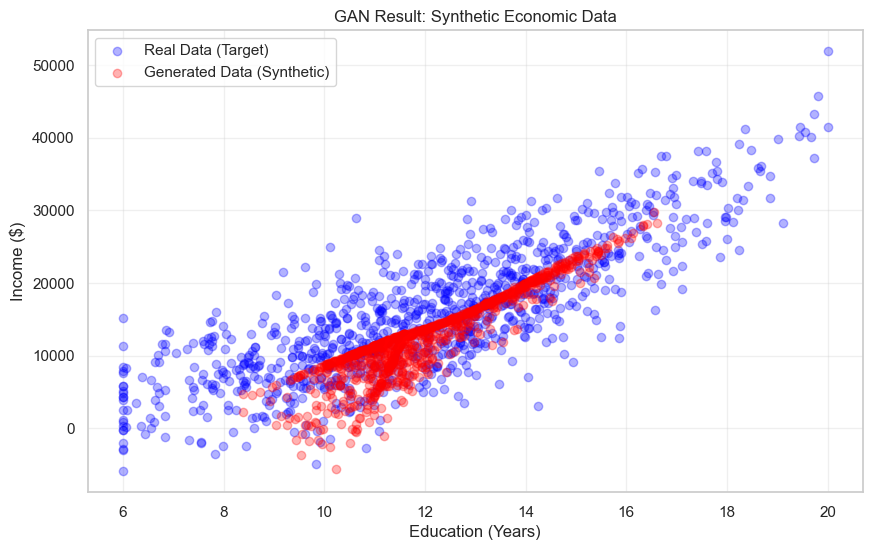

In [51]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# --- 1. Generate "Real" Economic Data ---
# Let's simulate 1,000 people.
# Rule: Higher Education = Higher Income (non-linear relationship)
def get_real_data(n=1000):
    # Education: Normal dist centered at 12 years (High School), std dev 3
    education = np.random.normal(12, 3, n)
    education = np.clip(education, 6, 20)  # Clip between 6th grade and PhD

    # Income: Correlated with education + random noise
    # Formula: Income = (Education^2 * 100) + Noise
    income = (education**2) * 100 + np.random.normal(0, 5000, n)

    # Stack them: Column 0 = Education, Column 1 = Income
    data = np.stack([education, income], axis=1)
    return data


real_data_numpy = get_real_data()

# IMPORTANT: GANs fail if data isn't normalized.
# We scale everything to be roughly between -1 and 1.
data_mean = real_data_numpy.mean(axis=0)
data_std = real_data_numpy.std(axis=0)
real_data_scaled = (real_data_numpy - data_mean) / data_std

# Convert to PyTorch Tensor
real_data_tensor = torch.tensor(real_data_scaled, dtype=torch.float32)


# --- 2. Define the Generator ( The Counterfeiter ) ---
# Input: Random Noise (z) -> Output: Synthetic [Education, Income]
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(5, 16),  # Input is a noise vector of size 5
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),  # Output is 2 features (Edu, Inc)
        )

    def forward(self, z):
        return self.net(z)


# --- 3. Define the Discriminator ( The Detective ) ---
# Input: [Education, Income] -> Output: Probability (0=Fake, 1=Real)
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 32),
            nn.LeakyReLU(0.2),  # LeakyReLU is standard for GAN discriminators
            nn.Linear(32, 16),
            nn.LeakyReLU(0.2),
            nn.Linear(16, 1),
            nn.Sigmoid(),  # Output probability between 0 and 1
        )

    def forward(self, x):
        return self.net(x)


# --- 4. Training Loop ---
G = Generator()
D = Discriminator()

# Hyperparameters
lr = 0.001
epochs = 5000
batch_size = 64
loss_func = nn.BCELoss()  # Binary Cross Entropy

# Separate Optimizers
optimizer_G = optim.Adam(G.parameters(), lr=lr)
optimizer_D = optim.Adam(D.parameters(), lr=lr)

print("Training GAN... (This aligns the distributions)")

for epoch in range(epochs):
    # --- A. Train Discriminator (Maximize ability to distinguish) ---
    # 1. Real Data
    idx = np.random.randint(0, real_data_tensor.shape[0], batch_size)
    real_batch = real_data_tensor[idx]
    real_labels = torch.ones(batch_size, 1)  # Label 1 for Real

    d_loss_real = loss_func(D(real_batch), real_labels)

    # 2. Fake Data
    noise = torch.randn(batch_size, 5)  # Generate random noise
    fake_batch = G(noise)
    fake_labels = torch.zeros(batch_size, 1)  # Label 0 for Fake

    # Detach fake_batch so we don't calculate gradients for G yet
    d_loss_fake = loss_func(D(fake_batch.detach()), fake_labels)

    d_loss = d_loss_real + d_loss_fake

    optimizer_D.zero_grad()
    # The Discriminator needs to forget the specific mistakes it made
    # on the previous batch of fake data so it can learn purely from the current batch.
    d_loss.backward()
    optimizer_D.step()

    # --- B. Train Generator (Maximize Discriminator's mistake) ---
    # We want D to output "1" (Real) for our fake data
    noise = torch.randn(batch_size, 5)
    fake_batch = G(noise)
    target_labels = torch.ones(batch_size, 1)  # We WANT these to be seen as real

    g_loss = loss_func(D(fake_batch), target_labels)

    optimizer_G.zero_grad()
    # The Generator is a completely different network
    # with its own weights. It needs its own "whiteboard" wiped clean.
    g_loss.backward()
    optimizer_G.step()

    if epoch % 500 == 0:
        print(
            f"Epoch {epoch}: D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}"
        )

# --- 5. Visualization: Real vs Fake ---
# Generate a lot of fake data to compare distributions
with torch.no_grad():
    noise = torch.randn(1000, 5)
    fake_data_scaled = G(noise).numpy()

# Un-scale the data back to original units (Years and Dollars)
fake_data_final = (fake_data_scaled * data_std) + data_mean

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(
    real_data_numpy[:, 0],
    real_data_numpy[:, 1],
    alpha=0.3,
    label="Real Data (Target)",
    color="blue",
)
plt.scatter(
    fake_data_final[:, 0],
    fake_data_final[:, 1],
    alpha=0.3,
    label="Generated Data (Synthetic)",
    color="red",
)
plt.xlabel("Education (Years)")
plt.ylabel("Income ($)")
plt.title("GAN Result: Synthetic Economic Data")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()